### Based on the Prima Indians Historical Diabetes data ,build a machine learning binary 
###         classification model to predict if a person is diabetic or not based on below features
###        Pregnancies 
###        Glucose
###        Blood Pressure
###        Skin Thickness
###        Insulin
###        BMI
###        Diabetes pedigree function
###        Age
###        Macro Skills: EDA, Feature Selection, Performance Metrics, Confusion Matrix, Accuracy 
###        Score, ROC curve, AUC Score
###        Micro Skills: Dist Plot, Box plot, Outlier Detection

### Importing Libraries

In [87]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [88]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Extracting diiferent information related to the data (EDA)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [90]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
print(df.isna().sum())
print("shape:",df.shape)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
shape: (768, 9)


In [92]:
df.shape

(768, 9)

In [93]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Graphical screening for variables

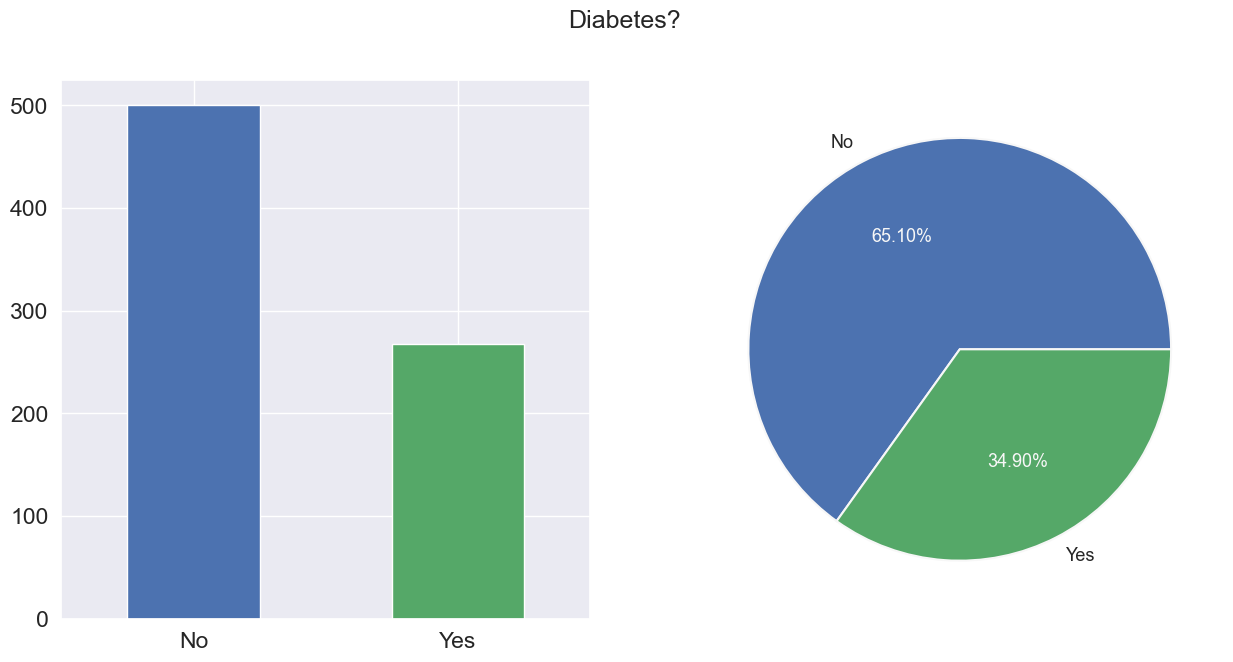

In [94]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

#### There are 34.90%  (diabetic) and 65.10%  (nondiabetic) in the data


### Pair Plot

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

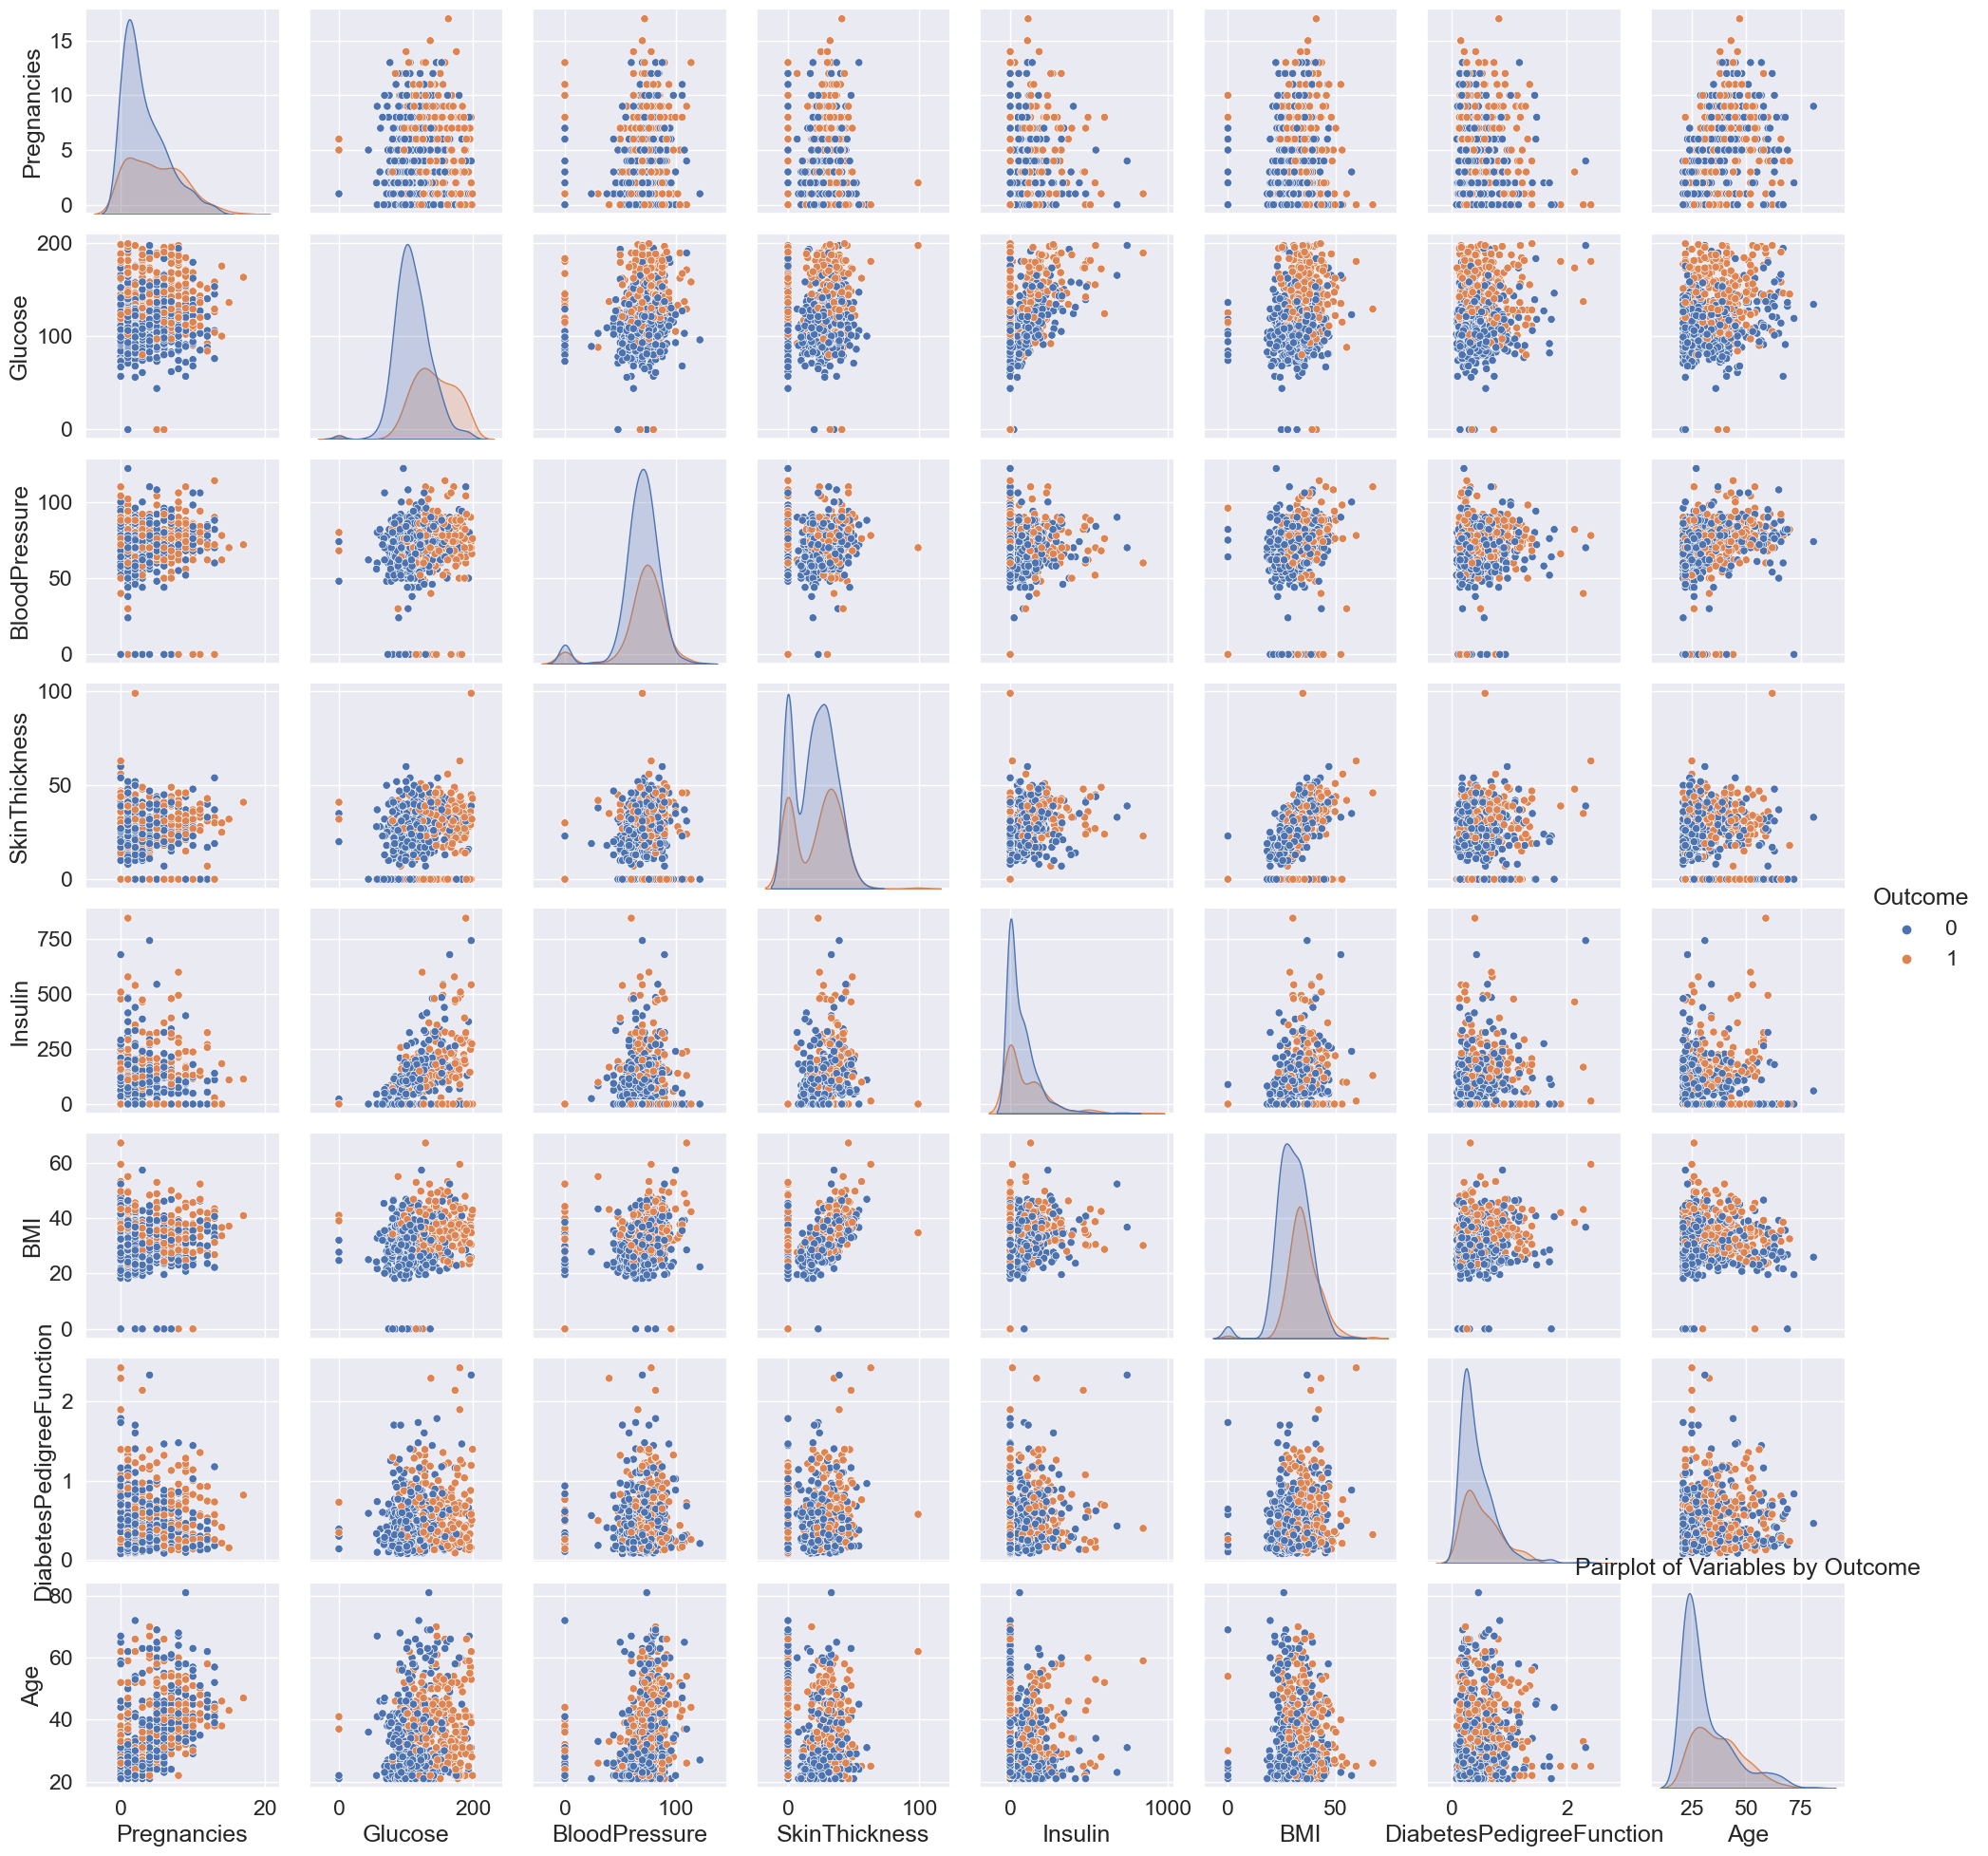

In [95]:
sns.pairplot(df, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

#### Diabetic women tend to show larger values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.
#### The feature that it is possible to see 2 distinct groups (diabetic and non diabetic) is glucose.
#### From scatter plots,  only BMI & SkinThickness and Pregnancies & Age seem to have positive linear relationships. Another likely suspect is Glucose and Insulin.
#### There are no non-linear relationships

### Dis Plot

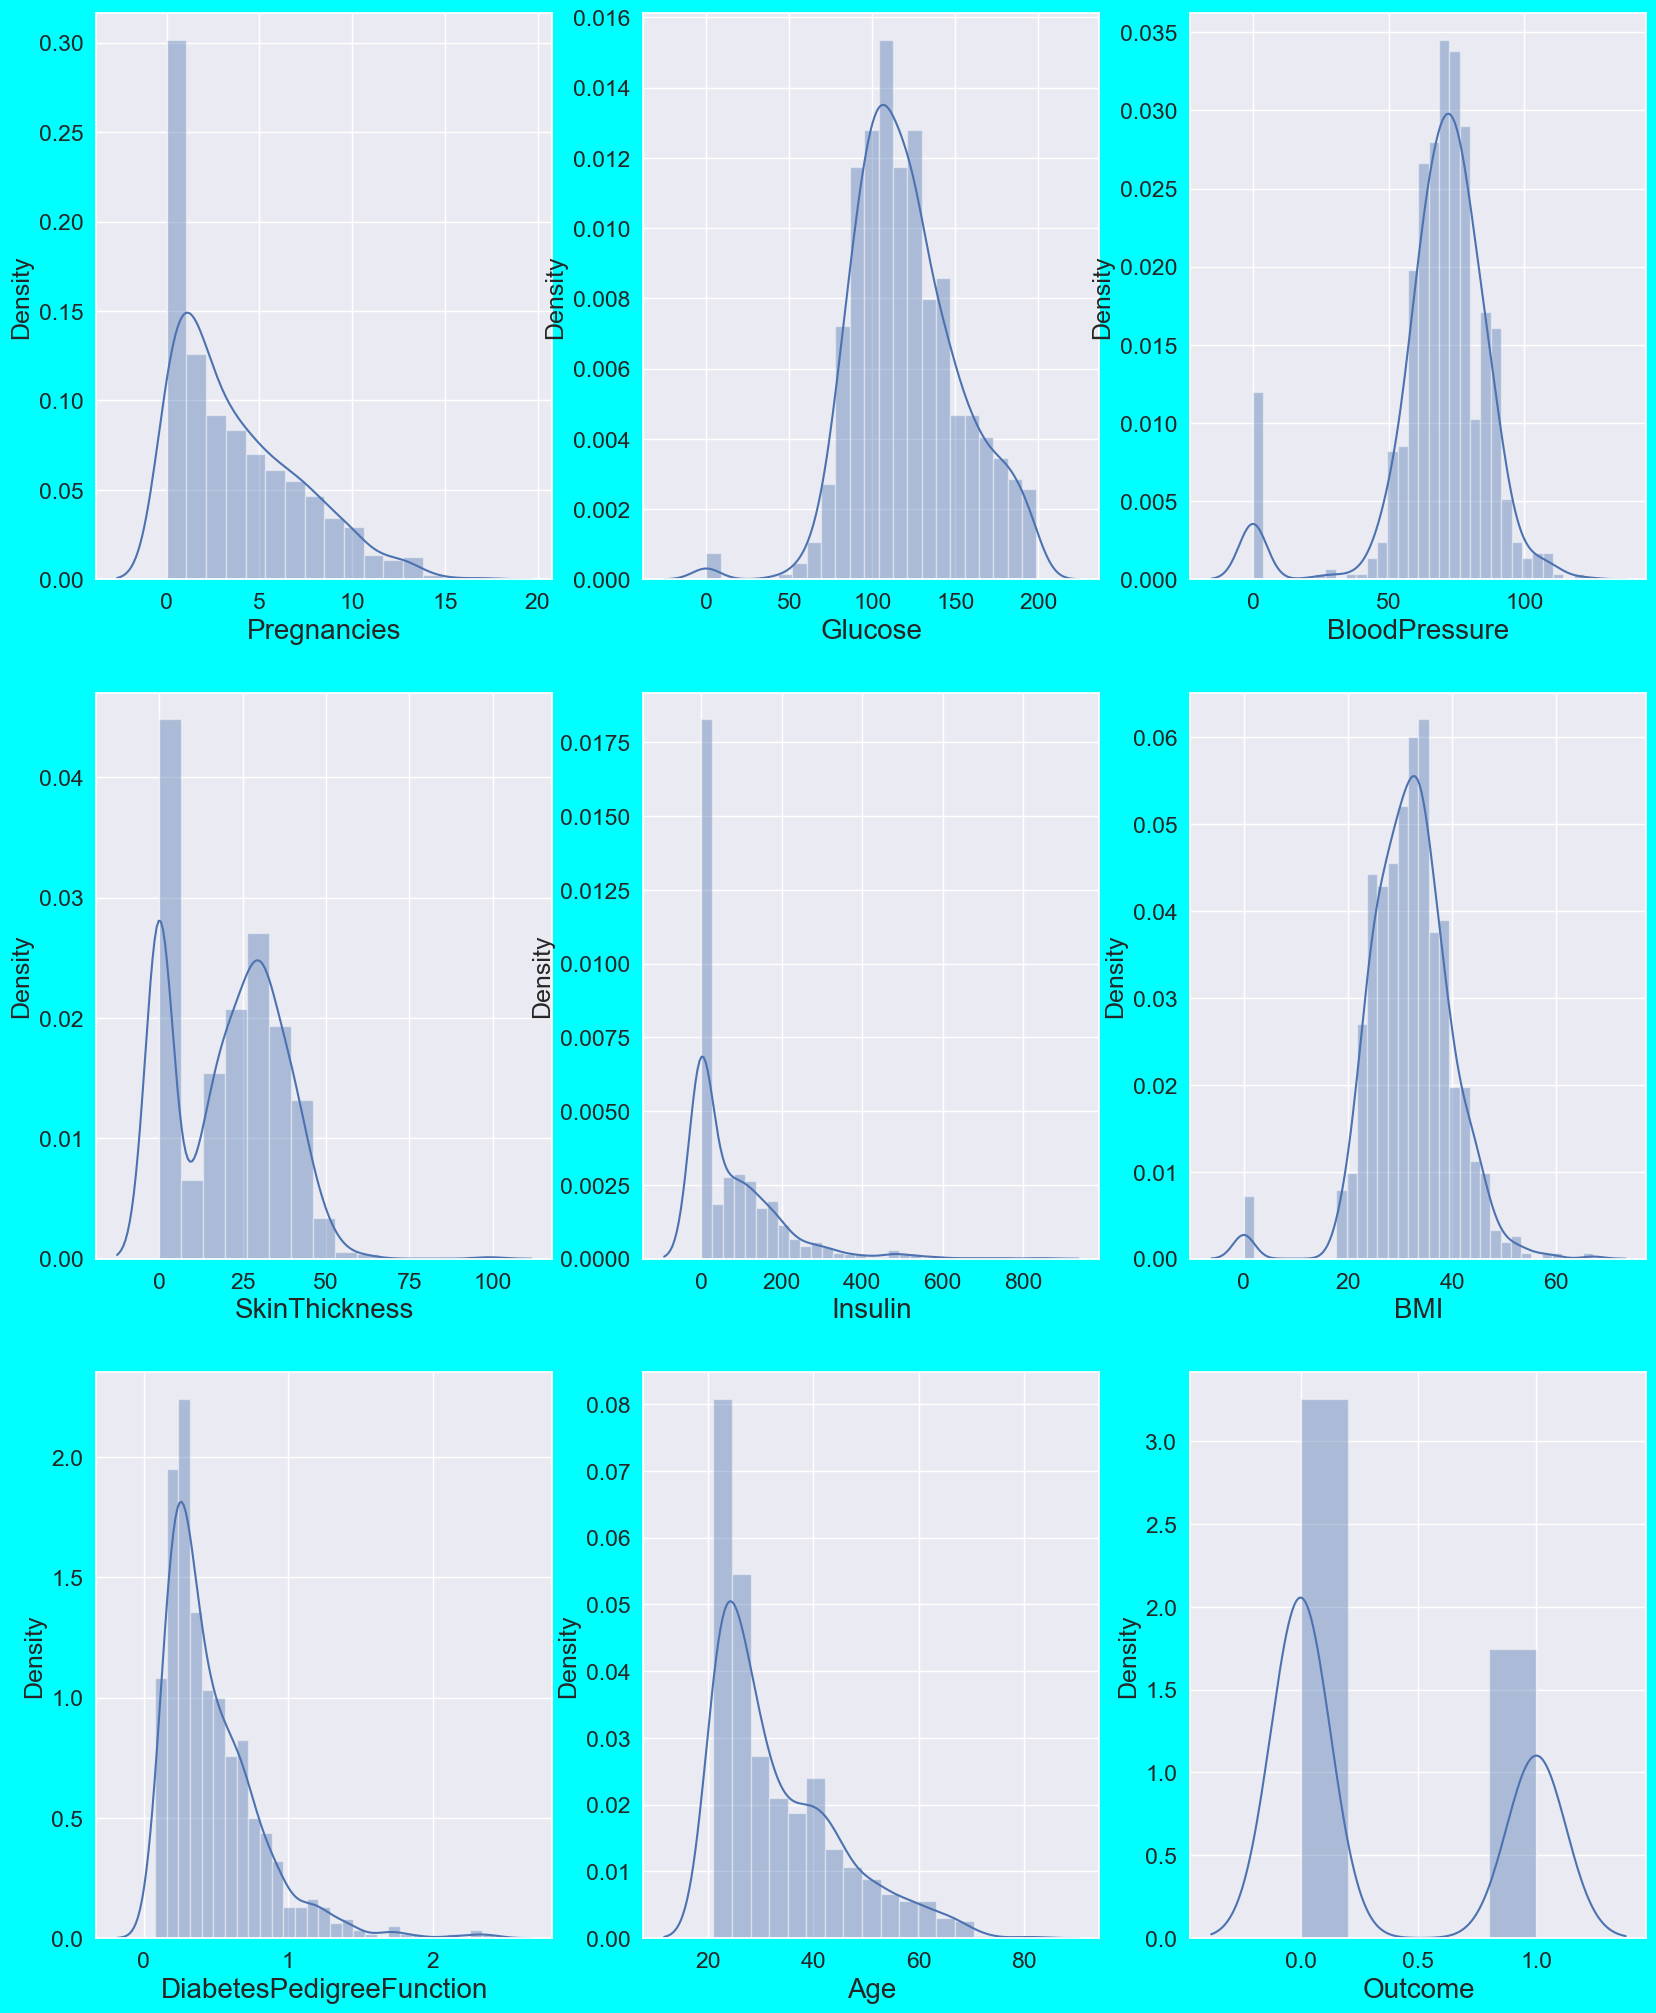

In [96]:
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

### Since there is ambiguity in data therefore we will try to remove it
### In order to do so we can firstly remove the 0's in the Dataset with mean of the whole dataset

In [97]:
df["Glucose"] = df["Glucose"].replace(0, df['Glucose'].mean())

In [98]:
df["BloodPressure"] = df["BloodPressure"].replace(0, df['BloodPressure'].mean())

In [99]:
df["SkinThickness"] = df["SkinThickness"].replace(0, df['SkinThickness'].mean())

In [100]:
df["Insulin"] = df["Insulin"].replace(0, df['Insulin'].mean())

In [101]:
df["BMI"] = df["BMI"].replace(0, df['BMI'].mean())

In [102]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


### New Dis Plot

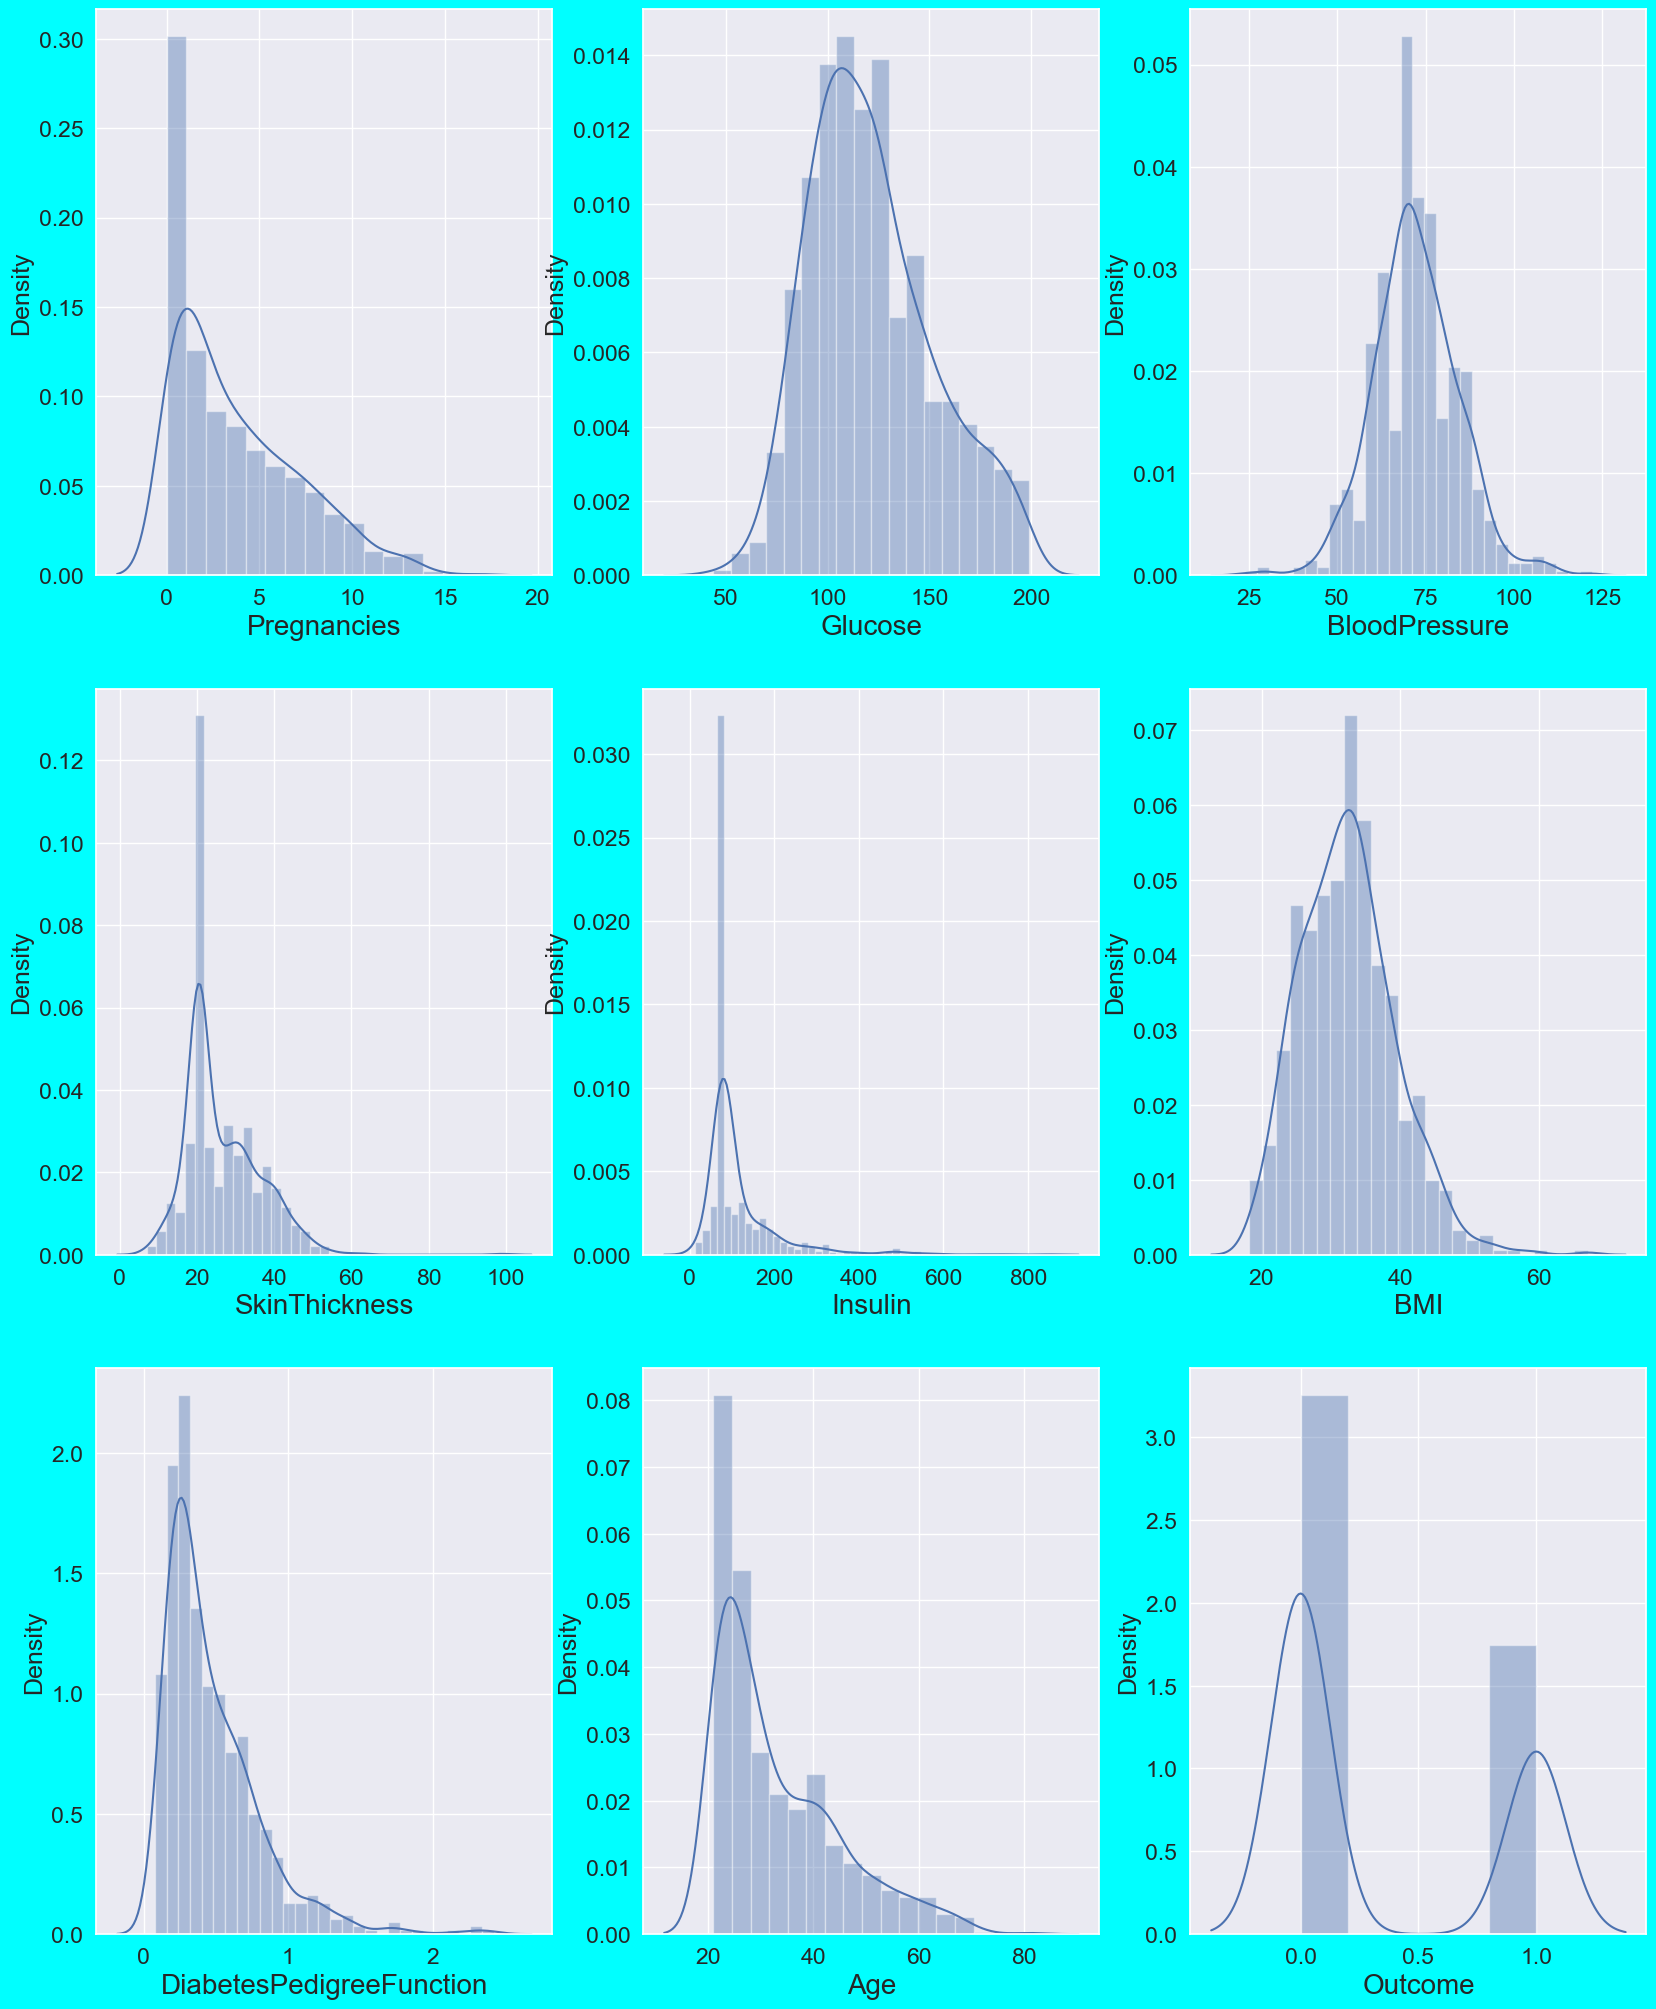

In [103]:
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

### Now we can use Boxplot to identify the ouliers in our Data 

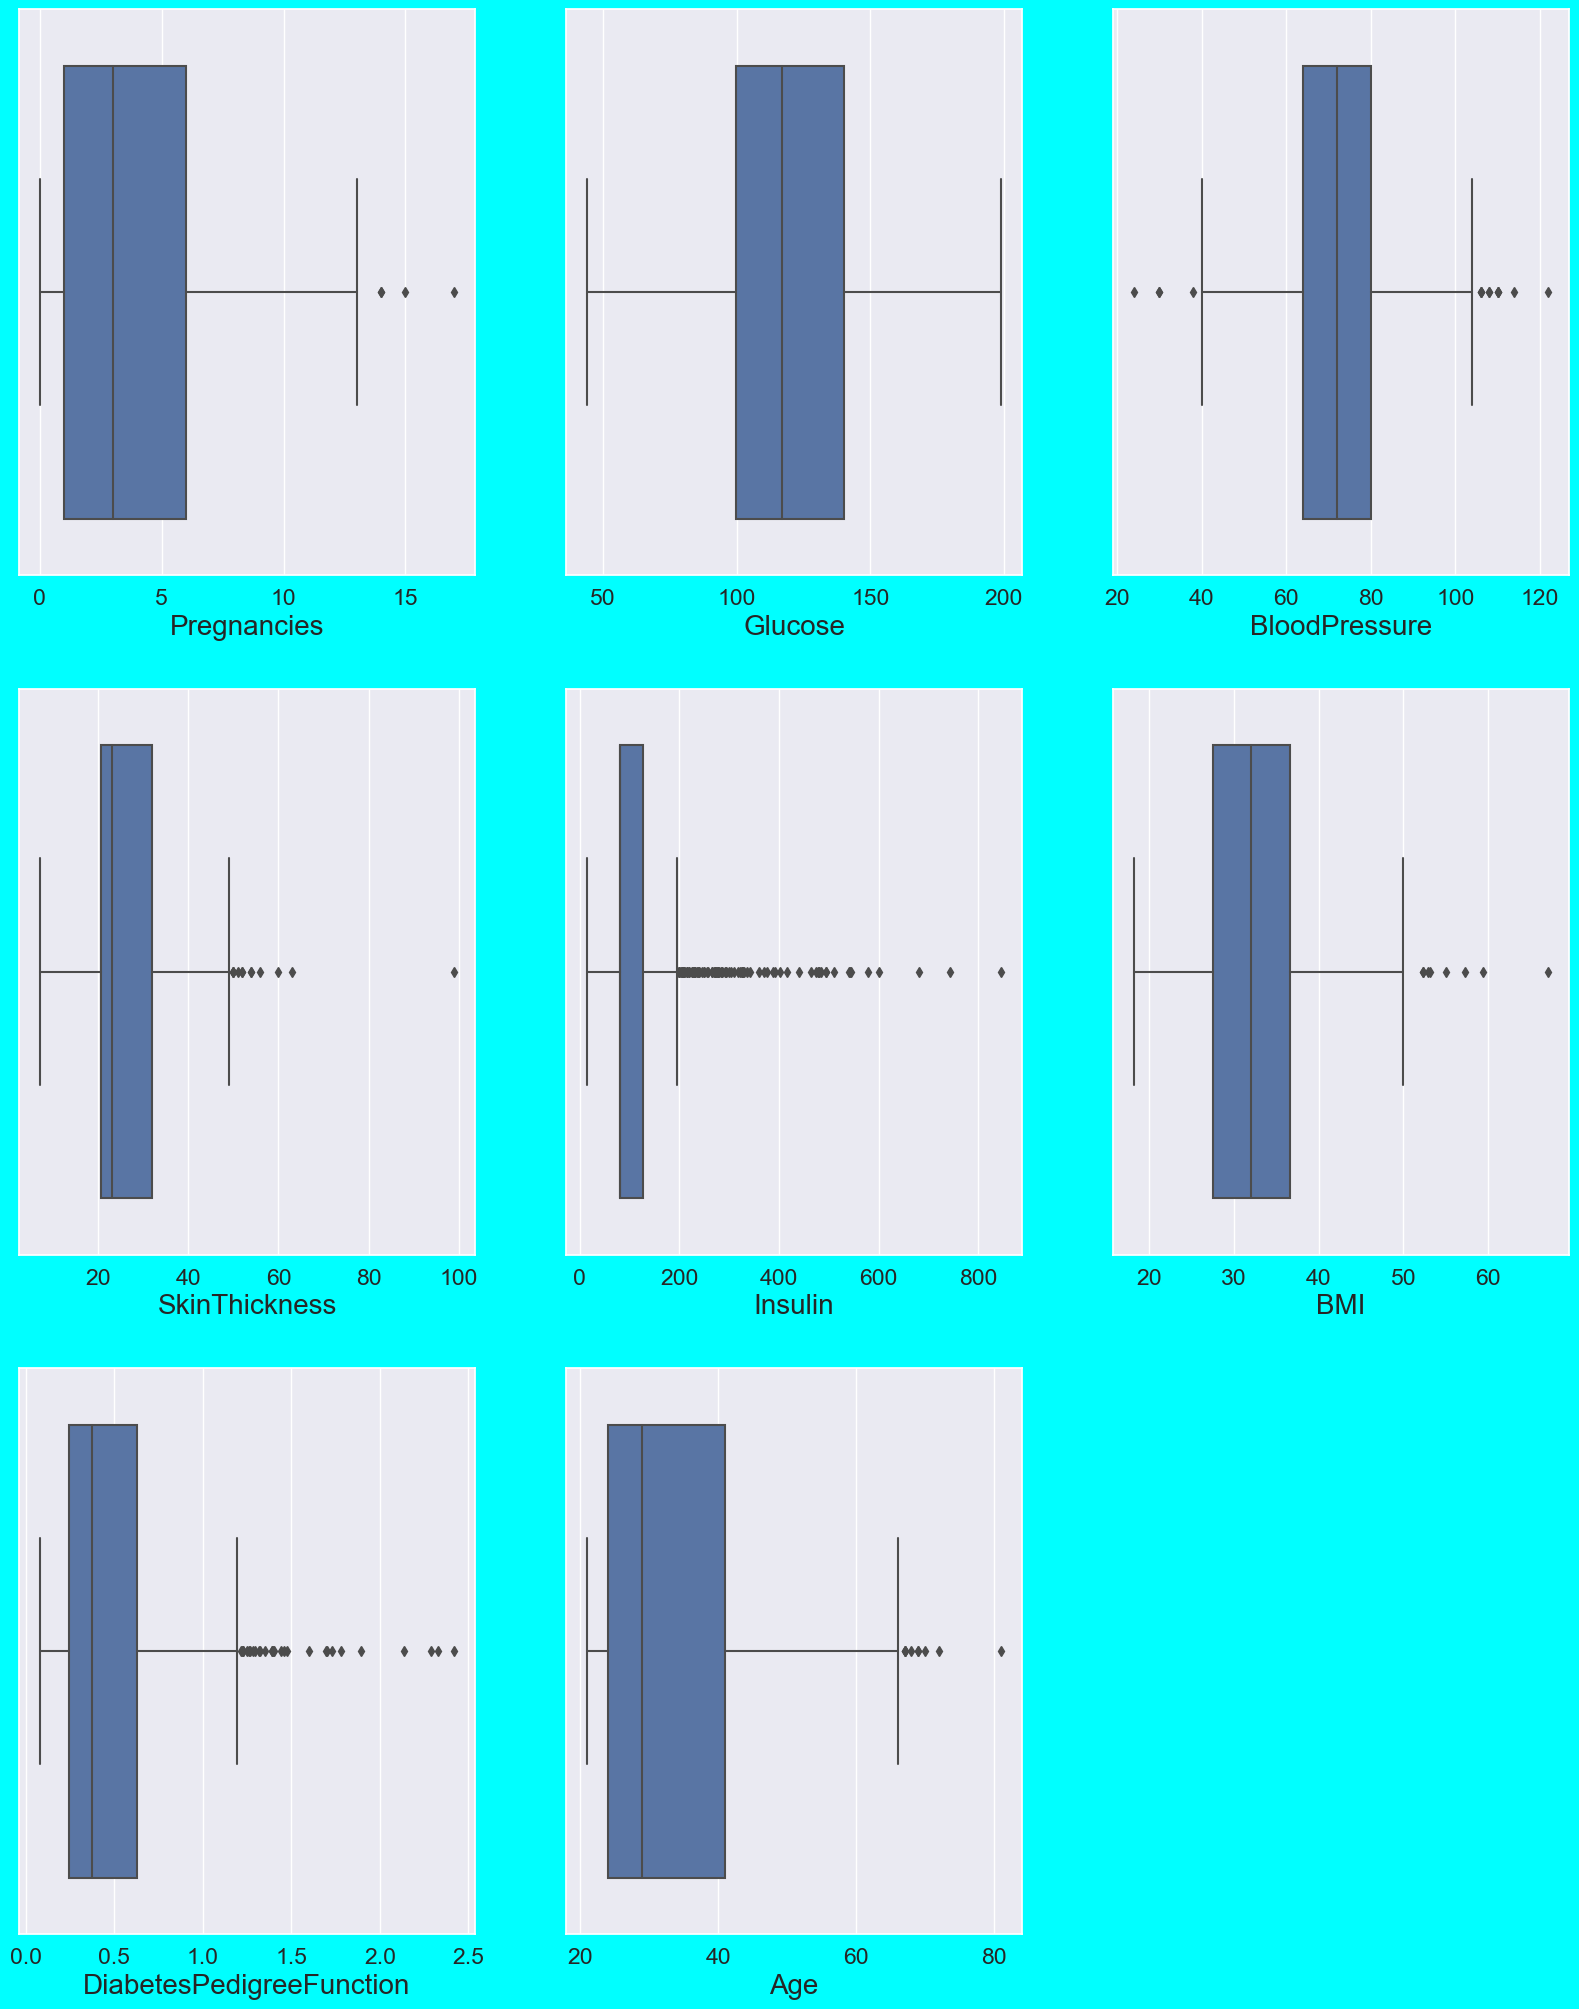

In [104]:
df_features = df.drop("Outcome", axis  =1)
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df_features:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

### trimming the data

In [105]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [106]:
preg_high=(q3.Pregnancies +1.5 * iqr.Pregnancies)
blood_high=(q3.BloodPressure +1.5 * iqr.BloodPressure)

skin_high=(q3.SkinThickness +1.5 * iqr.SkinThickness)
Insulin_high=(q3.Insulin +1.5 * iqr.Insulin)
bmi_high=(q3.BMI +1.5 * iqr.BMI)

age_high=(q3.Age +1.5 * iqr.Age)
Diabetes_high=(q3.DiabetesPedigreeFunction +1.5 * iqr.DiabetesPedigreeFunction)
blood_low=(q1.BloodPressure -1.5 * iqr.BloodPressure)
print(preg_high,blood_high,skin_high,Insulin_high,bmi_high,age_high,Diabetes_high,blood_low)

13.5 104.0 49.1953125 198.42578125 50.25 66.5 1.2 40.0


### Removing Outliers in Pregnancy Data

In [107]:
index1=np.where(df["Pregnancies"]>preg_high)
df=df.drop(df.index[index1])
index1

(array([ 88, 159, 298, 455], dtype=int64),)

### Remving Outliers in Skinthickness Data

In [108]:
index2=np.where(df["SkinThickness"]>skin_high)

df=df.drop(df.index[index2])
index2

(array([ 57,  86,  98, 119, 149, 209, 271, 273, 442, 528, 575, 587],
       dtype=int64),)

### Removing Outliers in Insulin Data

In [109]:
index3=np.where(df["Insulin"]>Insulin_high)
df=df.drop(df.index[index3])
index3


(array([  8,  13,  16,  20,  31,  39,  43,  53,  54,  56,  72,  92, 107,
        127, 134, 139, 147, 155, 179, 188, 192, 199, 207, 212, 220, 223,
        239, 240, 246, 250, 269, 276, 277, 286, 287, 298, 309, 324, 348,
        349, 353, 359, 364, 377, 381, 384, 398, 401, 404, 413, 414, 440,
        445, 467, 472, 473, 474, 498, 506, 524, 526, 531, 532, 541, 547,
        560, 569, 578, 590, 592, 596, 629, 639, 641, 646, 657, 663, 669,
        679, 684, 691, 694, 697, 699, 705, 732, 737], dtype=int64),)

### Removing Outliers in BloodPressure Data

In [110]:
index4=np.where(df["BloodPressure"]>blood_high)
df=df.drop(df.index[index4])
index4

(array([ 72,  90, 152, 311, 472, 568, 581, 597], dtype=int64),)

In [111]:
index5=np.where(df["BloodPressure"]<blood_low)
df=df.drop(df.index[index5])
index5

(array([ 15, 105, 508, 510], dtype=int64),)

### Removing Outliers in BMI Data

In [112]:
index6=np.where(df["BMI"]>bmi_high)
df=df.drop(df.index[index6])
index6

(array([162, 252], dtype=int64),)

### Removing Outliers in DiabetesPedigreeFunction

In [113]:
index7=np.where(df["DiabetesPedigreeFunction"]>Diabetes_high)
df=df.drop(df.index[index7])

index7

(array([  4,  11,  37,  46,  82, 122, 156, 181, 203, 205, 215, 243, 255,
        275, 310, 321, 453, 501, 520, 523, 524, 557, 559], dtype=int64),)

### Removing Outliers in Age

In [114]:
index8=np.where(df["Age"]>age_high)
df=df.drop(df.index[index8])
index8

(array([ 97, 290, 365, 369, 395, 439, 540, 546, 555], dtype=int64),)

In [115]:
df.shape

(619, 9)

### New Box Plot

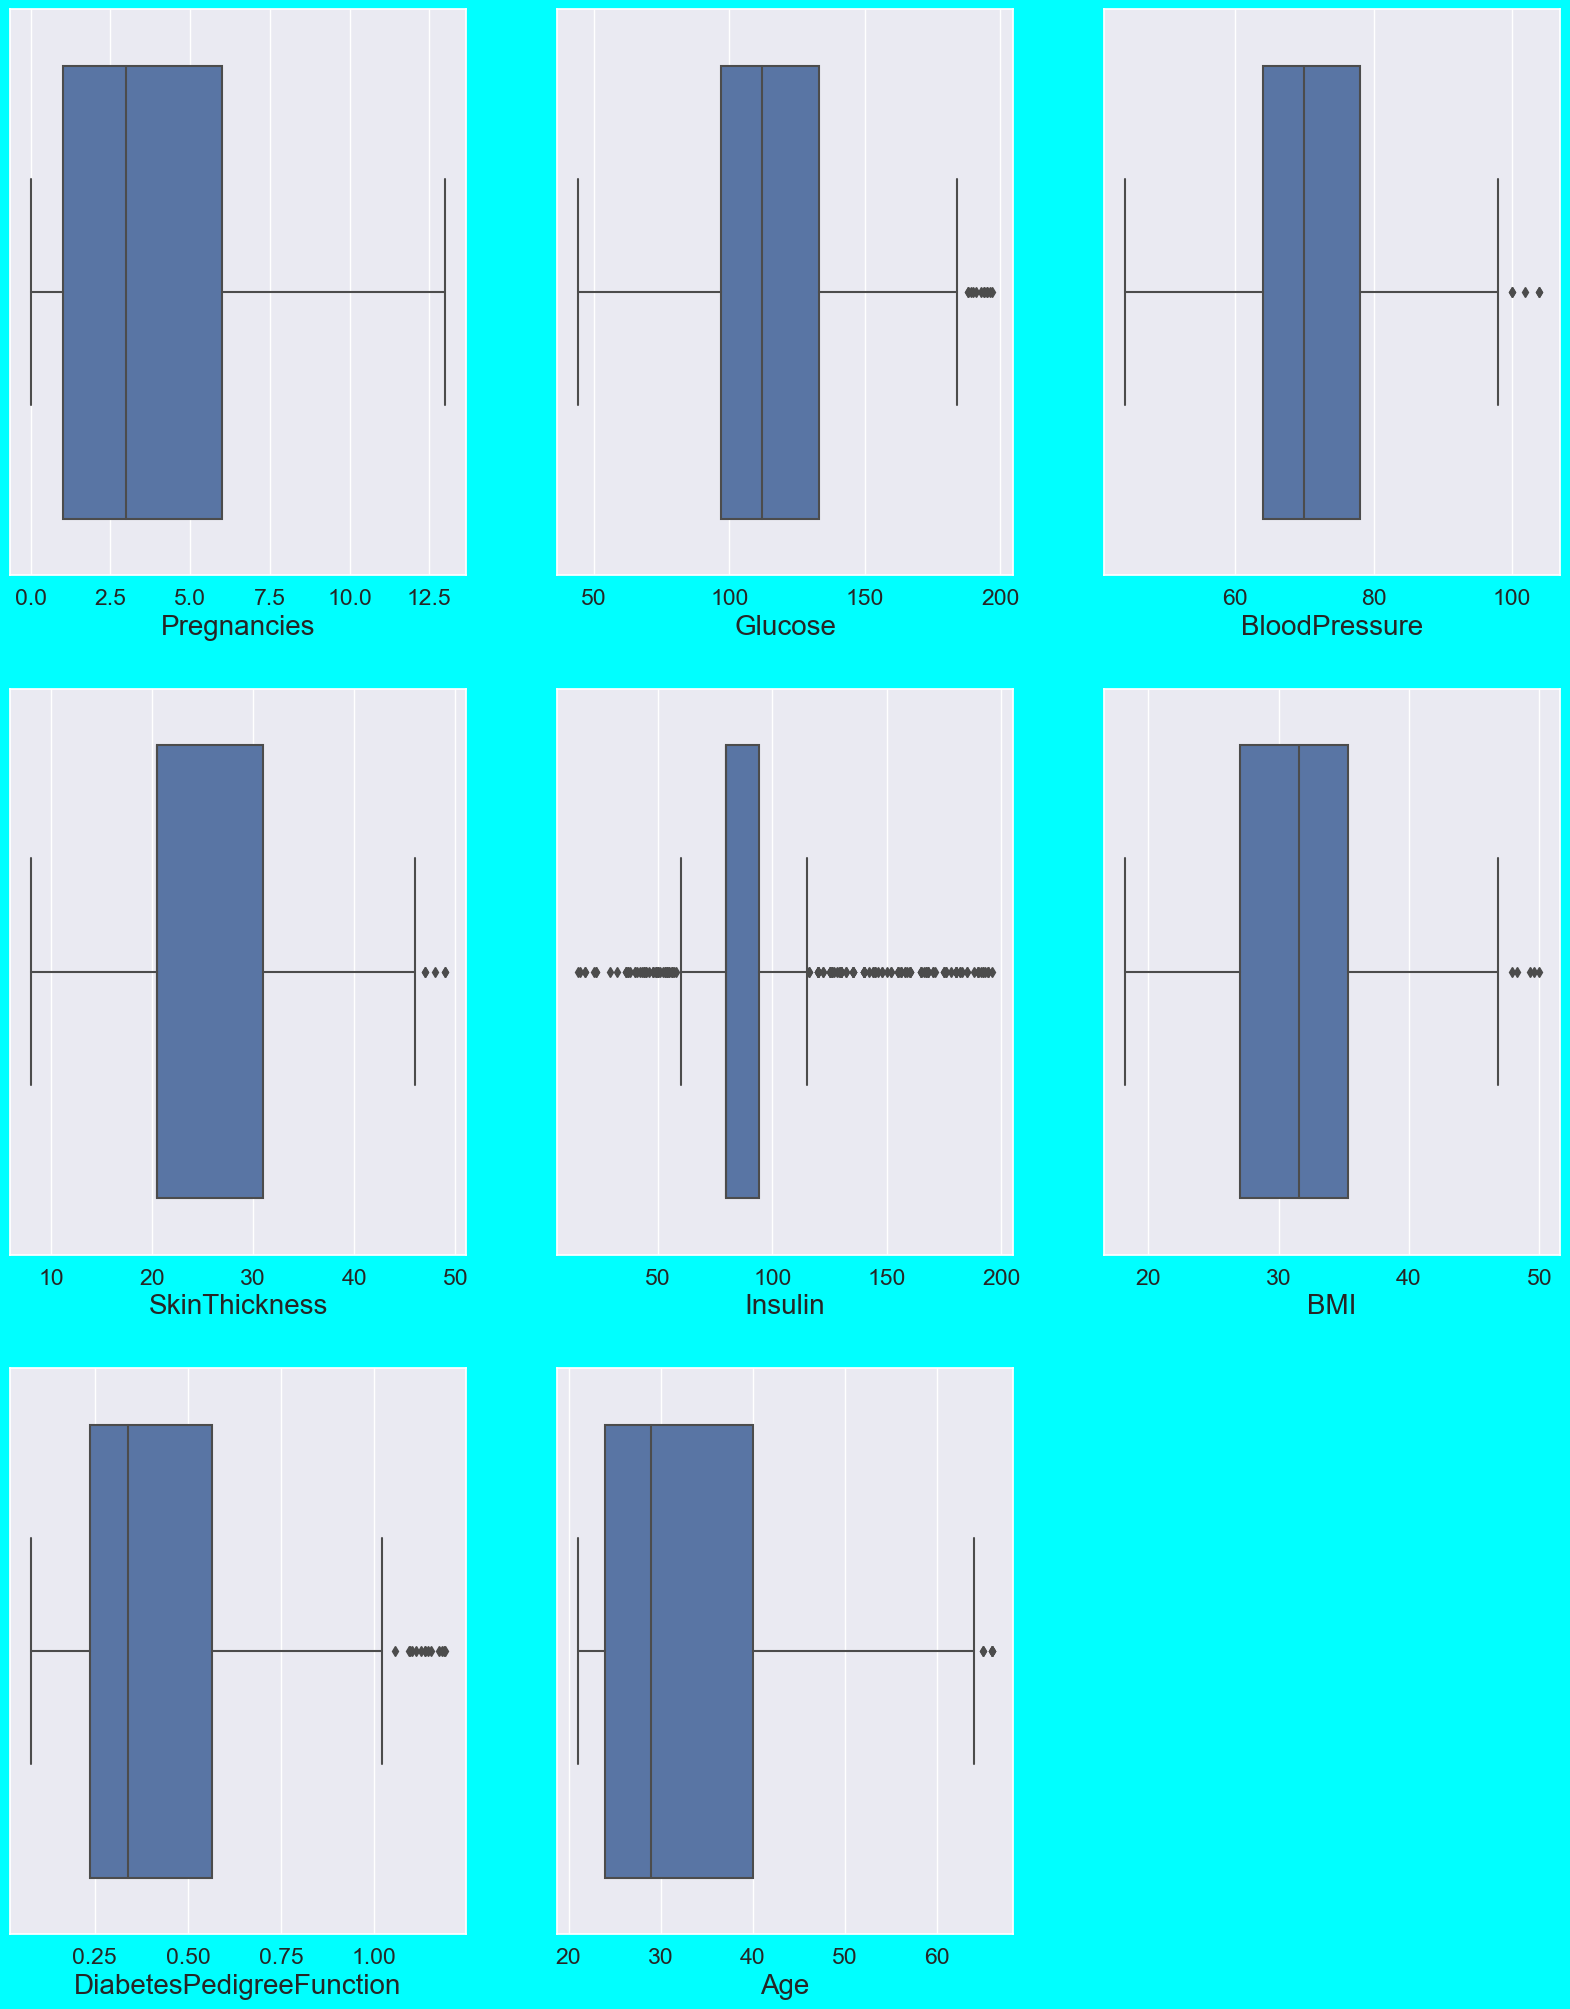

In [116]:
df_features = df.drop("Outcome", axis  =1)
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df_features:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

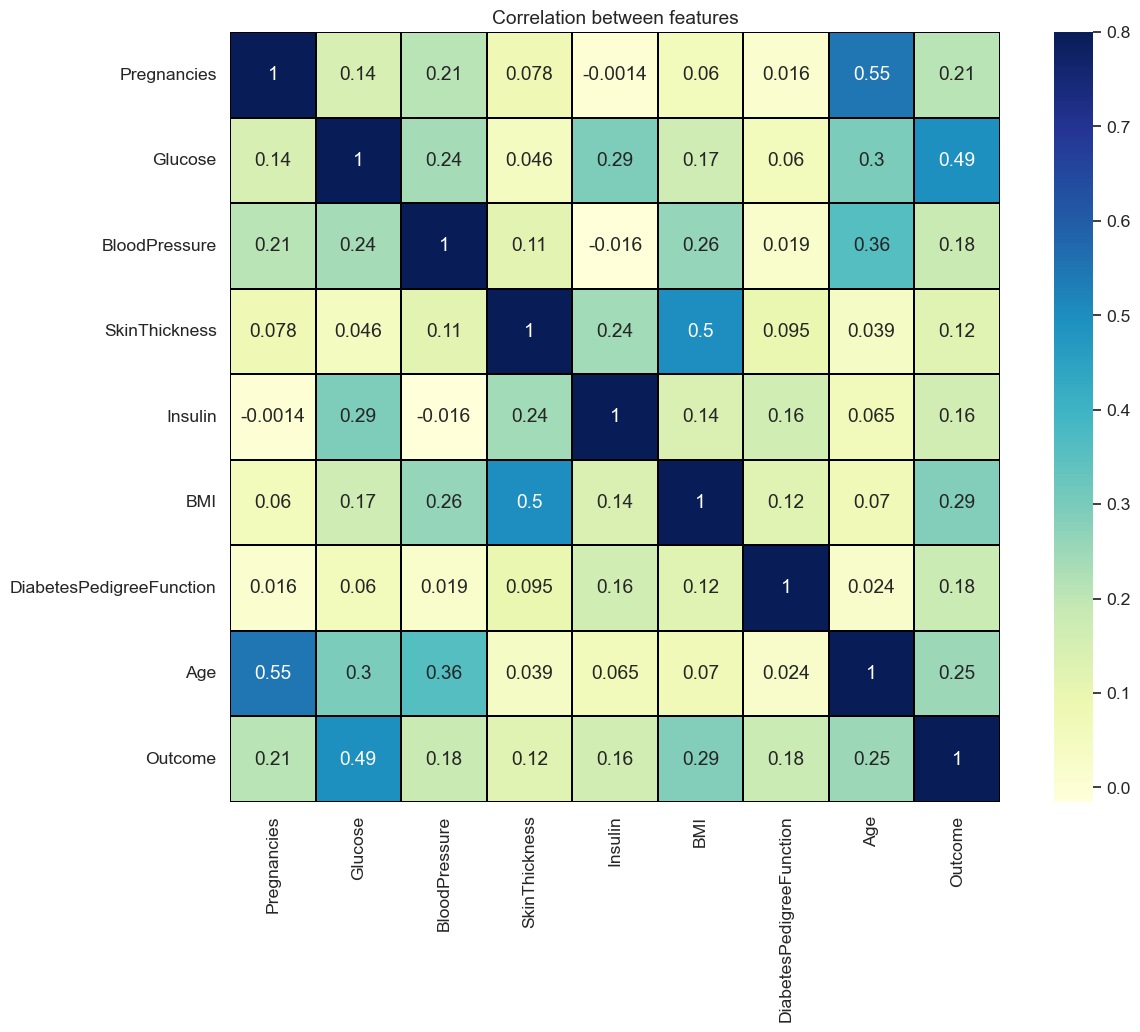

In [119]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

#### There are no strong correlation between the features. The 'strongest' ones are the following (as expected):
#### Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies
#### Glucose x insulin (0.58)
#### Glucose x outcome (0.52) - Women that have higher level of glucose tend to have higher level of insulin and have DM
#### Skin fold thickness x BMI (0.66) - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)
#### Negative correlation:
#### BMI x Pregnancies (-0.025)
#### Blood Pressure x Diabetes Pedigree Function (-0.016)

### Logistic Regression

In [77]:
df1=df.drop(['Outcome','DiabetesPedigreeFunction'], axis=1)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,50
1,1,85.0,66.0,29.000000,79.799479,26.6,31
2,8,183.0,64.0,20.536458,79.799479,23.3,32
3,1,89.0,66.0,23.000000,94.000000,28.1,21
5,5,116.0,74.0,20.536458,79.799479,25.6,30


In [78]:
X = df1.copy()

In [79]:
y = df["Outcome"]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
663,9,145.0,80.0,46.000000,130.000000,37.9,40
456,1,135.0,54.0,20.536458,79.799479,26.7,62
224,1,100.0,66.0,15.000000,56.000000,23.6,26
741,3,102.0,44.0,20.000000,94.000000,30.8,26
252,2,90.0,80.0,14.000000,55.000000,24.4,24


### Importing Necessary Libraries

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

Accuracy  87.09677419354838


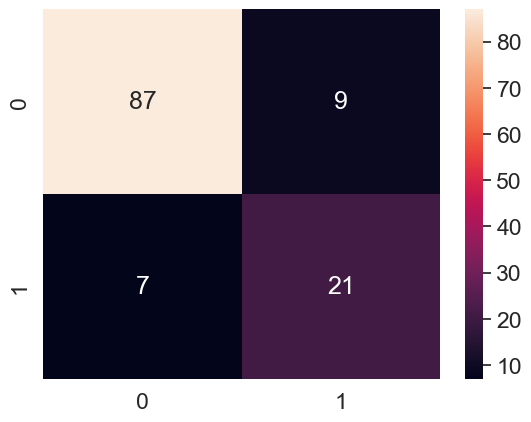

In [122]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#### The confusion matrix shows that 87 + 21 are correct predictions and 9 + 7 are incorrect predictions.

####  Calculate Precision, Recall, F1 and ROC-AUC metrics

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


print(f'precision: {precision_score(y_test, y_pred)*100:.4f}\n')

print(f'recall: {recall_score(y_test, y_pred)*100:.4f}\n')


print(f'F1: {f1_score(y_test, y_pred)*100:.4f}\n')


print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)*100:.4f}')

precision: 72.3404

recall: 64.1509

F1: 68.0000

ROC-AUC: 77.1883


In [72]:
from sklearn.metrics import roc_curve, auc

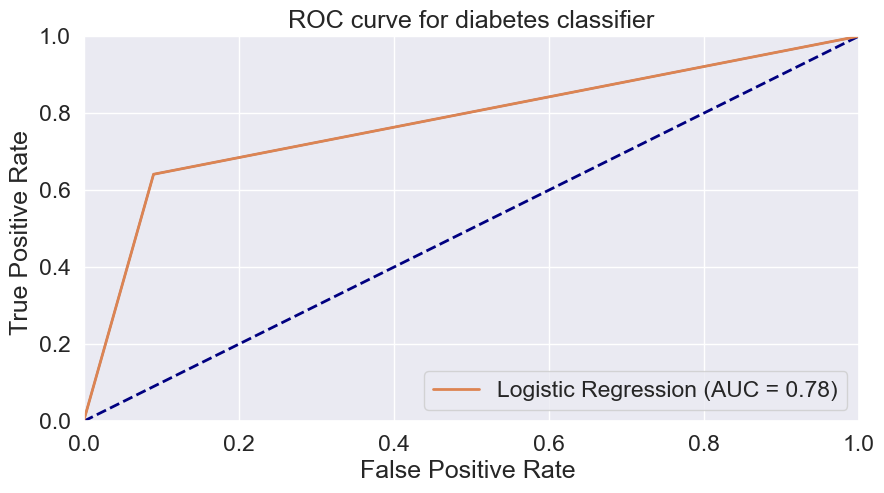

In [74]:
FPR, TPR, thresholds = roc_curve(y_test,y_pred)

plt.figure(figsize=(10,5))  
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='Logistic Regression (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.grid(True)
plt.legend(loc="lower right")